Colonne trovate nel CSV: Index(['ID', 'Date', 'Sentiment'], dtype='object')

📊 Medie annuali dei sentiment:
    anno  Sentiment
0  2014   2.361022
1  2015   1.988764
2  2016   2.018391
3  2017   2.002083
4  2018   1.835556
5  2019   1.900000
6  2020   1.740741
7  2021   1.840000
8  2022   1.625000


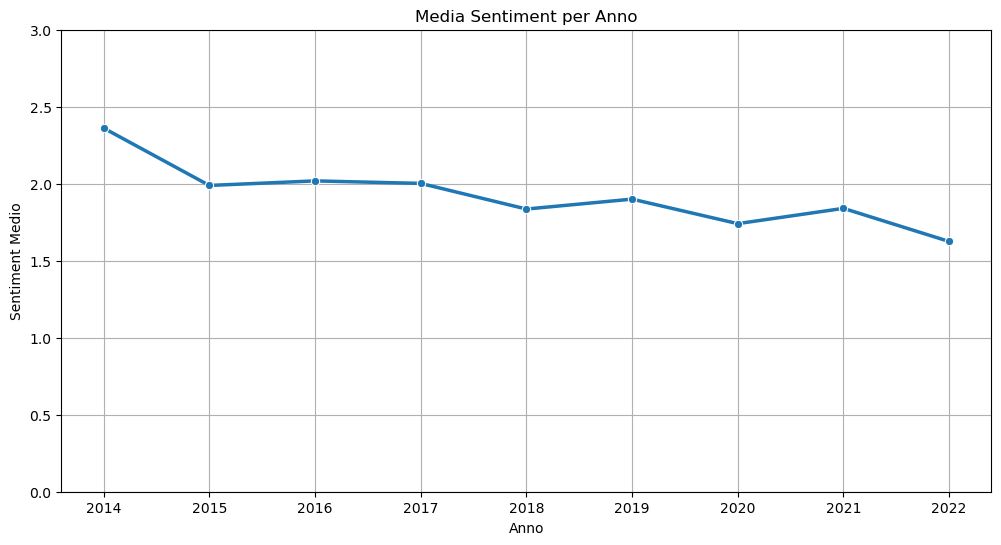

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caricare il CSV
df = pd.read_csv("./sentiment_weird.csv")

# Controllare i nomi delle colonne
print("Colonne trovate nel CSV:", df.columns)

# Pulire i nomi delle colonne (rimuove eventuali spazi)
df.columns = df.columns.str.strip()

# Convertire la colonna 'data' in formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# Estrarre l'anno
df["anno"] = df["Date"].dt.year

# Calcolare la media dei sentiment per ogni anno
df_grouped = df.groupby("anno")["Sentiment"].mean().reset_index()

# Stampare le medie annuali
print("\n📊 Medie annuali dei sentiment:\n", df_grouped)

# Creare il grafico
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_grouped["anno"], y=df_grouped["Sentiment"], marker="o", linewidth=2.5)

# Personalizzazione del grafico
plt.title("Media Sentiment per Anno")
plt.xlabel("Anno")
plt.ylabel("Sentiment Medio")
plt.ylim(0, 3)  # Imposta i limiti dell'asse y da 0 a 3
plt.grid(True)
plt.show()


In [27]:
# Convertire la colonna 'data' in formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# Estrarre l'anno
df["anno"] = df["Date"].dt.year

# Contare quante notizie ci sono per anno
notizie_per_anno = df["anno"].value_counts().sort_index()

# Stampare il conteggio delle notizie per anno
print("\n📰 Numero di notizie per anno:\n", notizie_per_anno)



📰 Numero di notizie per anno:
 anno
2014    313
2015    801
2016    870
2017    480
2018    225
2019     20
2020     27
2021     25
2022     16
Name: count, dtype: int64



📰 Numero di notizie per anno:
 anno
2014    313
2015    801
2016    870
2017    480
2018    225
2019     20
2020     27
2021     25
2022     16
Name: count, dtype: int64


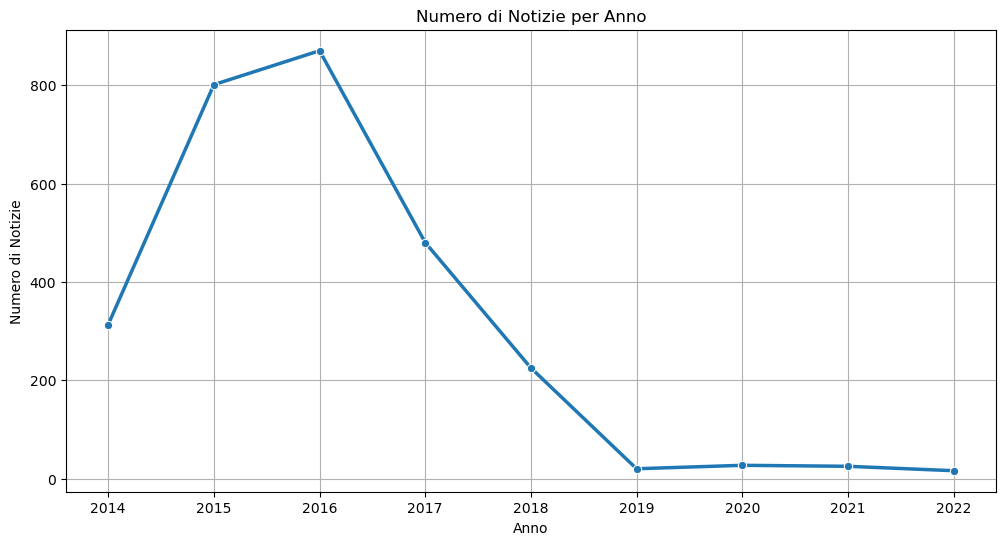

In [29]:
# Convertire la colonna 'data' in formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# Estrarre l'anno
df["anno"] = df["Date"].dt.year

# Contare quante notizie ci sono per anno
notizie_per_anno = df["anno"].value_counts().sort_index()

# Stampare il conteggio delle notizie per anno
print("\n📰 Numero di notizie per anno:\n", notizie_per_anno)

# Creare il grafico
plt.figure(figsize=(12, 6))
sns.lineplot(x=notizie_per_anno.index, y=notizie_per_anno.values, marker="o", linewidth=2.5)

# Personalizzazione del grafico
plt.title("Numero di Notizie per Anno")
plt.xlabel("Anno")
plt.ylabel("Numero di Notizie")
plt.grid(True)

# Mostrare il grafico
plt.show()


📰 Numero di notizie per anno (2014-2016):
 anno
2014    313
2015    801
2016    870
Name: count, dtype: int64
📅 Notizie 2014 per stagione: [29, 54, 118, 112]
📅 Notizie 2015 per stagione: [180, 80, 196, 345]
📅 Notizie 2016 per stagione: [276, 234, 200, 160]


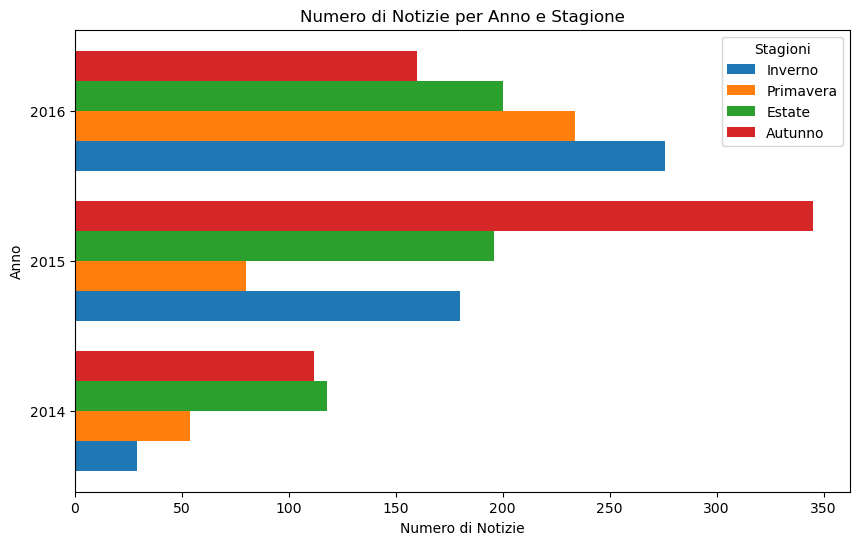

In [31]:
# Convertire la colonna 'Date' in datetime
df["Date"] = pd.to_datetime(df["Date"])

# Estrarre anno e mese
df["anno"] = df["Date"].dt.year
df["mese"] = df["Date"].dt.month

# Filtrare le notizie tra il 2014 e il 2016
df_2014_2016 = df[(df["anno"] >= 2014) & (df["anno"] <= 2016)]

# Contare quante notizie ci sono per ogni anno
notizie_per_anno = df_2014_2016["anno"].value_counts().sort_index()

# Stampare il risultato
print("\n📰 Numero di notizie per anno (2014-2016):\n", notizie_per_anno)

# Creare tre variabili con i valori come liste di interi
notizie_2014 = [notizie_per_anno.get(2014, 0)]  # Se non esiste, mettiamo 0
notizie_2015 = [notizie_per_anno.get(2015, 0)]
notizie_2016 = [notizie_per_anno.get(2016, 0)]

# Funzione per assegnare una stagione basata sul mese
def assegna_stagione(mese):
    if mese in [12, 1, 2]: return "Inverno"
    elif mese in [3, 4, 5]: return "Primavera"
    elif mese in [6, 7, 8]: return "Estate"
    else: return "Autunno"

# Aggiungere la colonna "stagione" al dataframe
df_2014_2016 = df_2014_2016.copy()
df_2014_2016["stagione"] = df_2014_2016["mese"].apply(assegna_stagione)



# Contare le notizie per stagione e anno
notizie_per_stagione_anno = df_2014_2016.groupby(["anno", "stagione"]).size().unstack(fill_value=0)

# Ordinare le stagioni
stagioni_ordine = ["Inverno", "Primavera", "Estate", "Autunno"]
notizie_per_stagione_anno = notizie_per_stagione_anno.reindex(columns=stagioni_ordine)

# Creare i vettori per ogni anno
notizie_2014 = list(notizie_per_stagione_anno.loc[2014] if 2014 in notizie_per_stagione_anno.index else [0, 0, 0, 0])
notizie_2015 = list(notizie_per_stagione_anno.loc[2015] if 2015 in notizie_per_stagione_anno.index else [0, 0, 0, 0])
notizie_2016 = list(notizie_per_stagione_anno.loc[2016] if 2016 in notizie_per_stagione_anno.index else [0, 0, 0, 0])

# Stampare i risultati
print("📅 Notizie 2014 per stagione:", notizie_2014)
print("📅 Notizie 2015 per stagione:", notizie_2015)
print("📅 Notizie 2016 per stagione:", notizie_2016)

# Definire gli anni e le stagioni
anni = ["2014", "2015", "2016"]
stagioni = ["Inverno", "Primavera", "Estate", "Autunno"]

# Dati delle notizie per stagione e anno
dati = np.array([notizie_2014, notizie_2015, notizie_2016])

# Definire colori per le stagioni
colori = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Posizioni delle barre (una per ogni anno)
y_pos = np.arange(len(anni))

# Larghezza delle barre
bar_height = 0.2  

# Creare il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungere le barre per ogni stagione
for i in range(len(stagioni)):
    ax.barh(y_pos + i * bar_height, dati[:, i], height=bar_height, label=stagioni[i], color=colori[i])

# Etichette sugli assi
ax.set_yticks(y_pos + bar_height * 1.5)
ax.set_yticklabels(anni)
ax.set_xlabel("Numero di Notizie")
ax.set_ylabel("Anno")
ax.set_title("Numero di Notizie per Anno e Stagione")

# Aggiungere la legenda
ax.legend(title="Stagioni")

# Mostrare il grafico
plt.show()


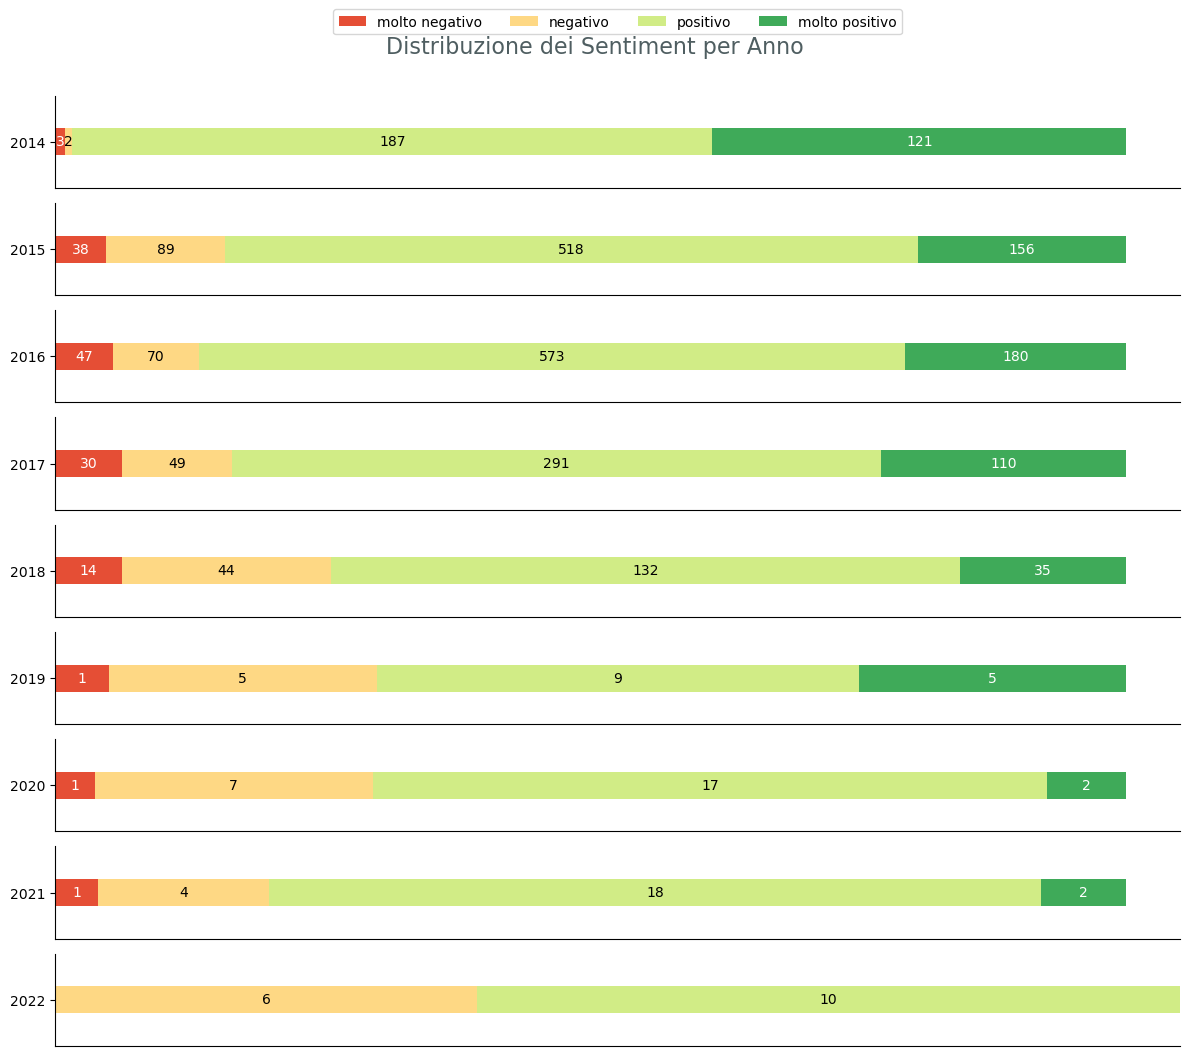

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Creiamo un dizionario che conta le occorrenze di ogni sentiment per anno
diz_anni_conteggio = defaultdict(lambda: defaultdict(int))
for i, riga in df.iterrows():
    year = riga["Date"].year
    sentiment = riga["Sentiment"]
    diz_anni_conteggio[year][sentiment] += 1

# Definiamo i colori e le etichette
category_names = ['molto negativo', 'negativo', 'positivo', 'molto positivo']
colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, 4))

# Creiamo un grafico per ogni anno con più spazio in alto
fig, axes = plt.subplots(len(diz_anni_conteggio), 1, figsize=(12, 1.2*len(diz_anni_conteggio)))

# Aggiungiamo spazio extra in alto prima di aggiungere il titolo
plt.subplots_adjust(top=0.85, hspace=0.5)

# Aggiungiamo il titolo
fig.suptitle("Distribuzione dei Sentiment per Anno", fontsize=16, color="#4F5E61", y=0.95)

for idx, (year, sentiments) in enumerate(sorted(diz_anni_conteggio.items())):
    # Prepariamo i dati per l'anno corrente
    values = np.array([sentiments.get(i, 0) for i in range(4)])
    
    # Otteniamo l'asse corretto
    ax = axes[idx] if len(diz_anni_conteggio) > 1 else axes
    
    # Calcoliamo le posizioni cumulative
    cumulative = np.cumsum(values)
    starts = cumulative - values
    
    # Creiamo le barre per ogni categoria
    for i, (width, start, color, cat) in enumerate(zip(values, starts, colors, category_names)):
        bar = ax.barh(year, width, left=start, height=0.35, color=color, label=cat if idx == 0 else "")
        
        # Aggiungiamo le etichette al centro di ogni sezione
        if width > 0:  # Solo se la sezione ha una larghezza > 0
            ax.text(start + width/2, year,
                   f'{int(width)}',
                   ha='center', va='center',
                   color='white' if np.mean(color[:3]) < 0.5 else 'black')
    
    # Personalizziamo il grafico
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    # Rimuoviamo i bordi del grafico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Impostiamo i limiti dell'asse y per mostrare solo l'anno e centrarla
    ax.set_yticks([year])
    ax.set_yticklabels([str(year)])
    
    # Aggiungiamo un po' di spazio sopra e sotto la barra
    ax.set_ylim(year - 0.6, year + 0.6)
    
    # Nascondiamo l'asse x
    ax.xaxis.set_visible(False)

# Aggiungiamo una legenda unica in alto
if len(diz_anni_conteggio) > 1:
    axes[0].legend(ncol=len(category_names), bbox_to_anchor=(0.5, 1.8), loc='center')
else:
    axes.legend(ncol=len(category_names), bbox_to_anchor=(0.5, 1.8), loc='center')

plt.tight_layout()
plt.show()

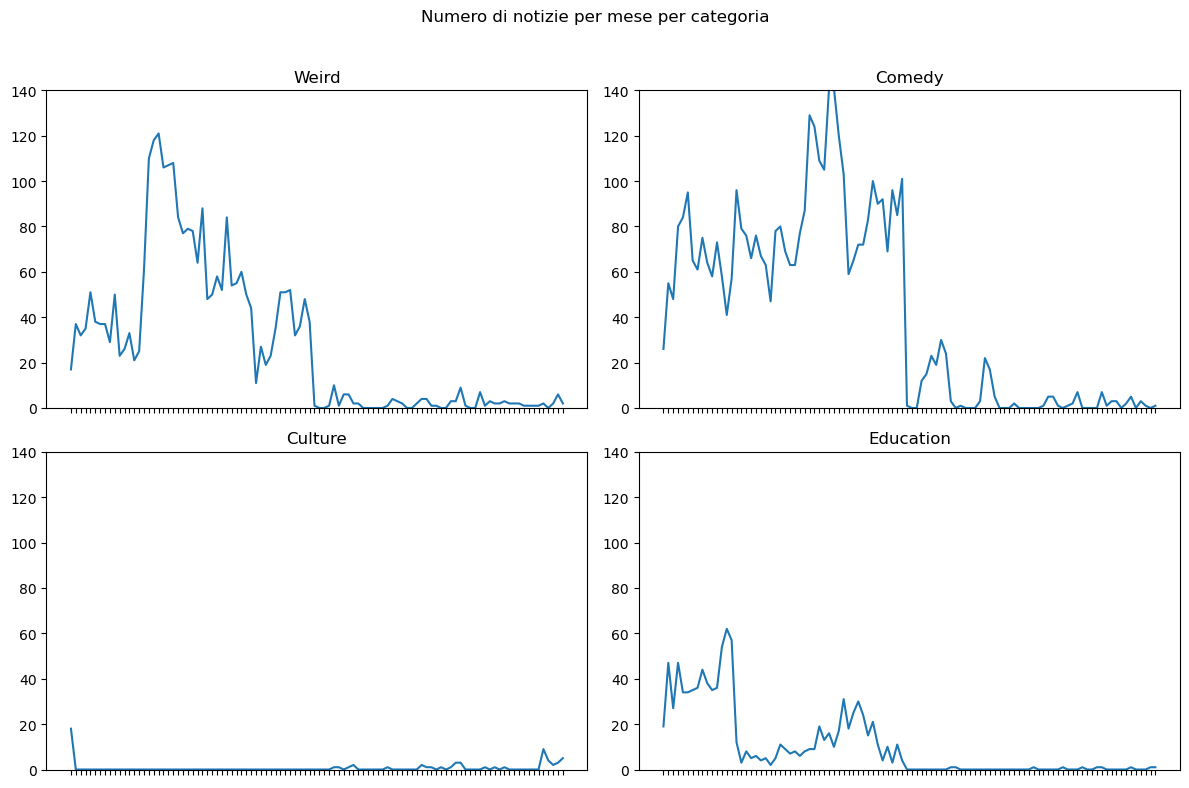

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricare il file CSV
df_weird = pd.read_csv("./Weird_news.csv")
df_comedy = pd.read_csv("./news_comedy.csv")
df_culture = pd.read_csv("./news_culture.csv")
df_education = pd.read_csv("./news_education.csv")

# Assicurarsi che la colonna della data sia in formato datetime
df_weird['date'] = pd.to_datetime(df_weird['date'], errors='coerce')
df_comedy['date'] = pd.to_datetime(df_comedy['date'], errors='coerce')
df_culture['date'] = pd.to_datetime(df_culture['date'], errors='coerce')
df_education['date'] = pd.to_datetime(df_education['date'], errors='coerce')

# Rimuovere eventuali righe con date non valide
df_weird = df_weird.dropna(subset=['date'])
df_comedy = df_comedy.dropna(subset=['date'])
df_culture = df_culture.dropna(subset=['date'])
df_education = df_education.dropna(subset=['date'])

# Ordinare i dataset per data in modo crescente
df_weird = df_weird.sort_values('date')
df_comedy = df_comedy.sort_values('date', ascending=True)
df_culture = df_culture.sort_values('date')
df_education = df_education.sort_values('date', ascending=True)

# Date di inizio specifiche per ogni dataset
start_date_weird = pd.to_datetime('2014-04-19')
start_date_comedy = pd.to_datetime('2012-01-28')
start_date_culture = pd.to_datetime('2012-01-28')
start_date_education = pd.to_datetime('2014-04-18')

# Filtrare i dataset dalla rispettiva data di inizio
df_weird = df_weird[df_weird['date'] >= start_date_weird]
df_comedy = df_comedy[df_comedy['date'] >= start_date_comedy]
df_culture = df_culture[df_culture['date'] >= start_date_culture]
df_education = df_education[df_education['date'] >= start_date_education]

# Contare il numero di notizie per mese
news_per_month_weird = df_weird.groupby(df_weird['date'].dt.to_period('M')).size()
news_per_month_comedy = df_comedy.groupby(df_comedy['date'].dt.to_period('M')).size()
news_per_month_culture = df_culture.groupby(df_culture['date'].dt.to_period('M')).size()
news_per_month_education = df_education.groupby(df_education['date'].dt.to_period('M')).size()

# Trovare l'intervallo di date comune
min_date = max(
    news_per_month_weird.index.min(), 
    news_per_month_comedy.index.min(),
    news_per_month_culture.index.min(), 
    news_per_month_education.index.min()
)
max_date = min(
    news_per_month_weird.index.max(), 
    news_per_month_comedy.index.max(),
    news_per_month_culture.index.max(), 
    news_per_month_education.index.max()
)

# Riempire i mesi mancanti con zero
def fill_missing_months(series, min_date, max_date):
    full_range = pd.period_range(start=min_date, end=max_date, freq='M')
    return series.reindex(full_range, fill_value=0)

news_per_month_weird = fill_missing_months(news_per_month_weird, min_date, max_date)
news_per_month_comedy = fill_missing_months(news_per_month_comedy, min_date, max_date)
news_per_month_culture = fill_missing_months(news_per_month_culture, min_date, max_date)
news_per_month_education = fill_missing_months(news_per_month_education, min_date, max_date)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
fig.suptitle('Numero di notizie per mese per categoria')

# Impostare la stessa scala per tutti i grafici
y_limit = 140

axes[0, 0].plot(news_per_month_weird.index.astype(str), news_per_month_weird.values, linestyle='-')
axes[0, 0].set_title('Weird')
axes[0, 0].set_ylim(0, y_limit)  # Imposta il limite dell'asse y
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticklabels([])  # Rimuove le etichette dell'asse x

axes[0, 1].plot(news_per_month_comedy.index.astype(str), news_per_month_comedy.values, linestyle='-')
axes[0, 1].set_title('Comedy')
axes[0, 1].set_ylim(0, y_limit)  # Imposta il limite dell'asse y
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xticklabels([])  # Rimuove le etichette dell'asse x

axes[1, 0].plot(news_per_month_culture.index.astype(str), news_per_month_culture.values, linestyle='-')
axes[1, 0].set_title('Culture')
axes[1, 0].set_ylim(0, y_limit)  # Imposta il limite dell'asse y
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xticklabels([])  # Rimuove le etichette dell'asse x

axes[1, 1].plot(news_per_month_education.index.astype(str), news_per_month_education.values, linestyle='-')
axes[1, 1].set_title('Education')
axes[1, 1].set_ylim(0, y_limit)  # Imposta il limite dell'asse y
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xticklabels([])  # Rimuove le etichette dell'asse x

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()